<a href="https://colab.research.google.com/github/pateljay7018/CE888-7-SP-D.S.-and-decision-making-/blob/main/Assignment-1/london_police_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
import numpy as np
import pandas as pd
import warnings
from google.colab import files
warnings.filterwarnings("ignore")

In [189]:
#connecting google drive for importing datasets

from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [190]:
#LONDON

london20_1 = pd.read_csv('/content/gdrive/My Drive/CE888/2020-01/2020-01-city-of-london-stop-and-search.csv')
london20_1["Date"] = "2020-01"
london20_2 = pd.read_csv('/content/gdrive/My Drive/CE888/2020-02/2020-02-city-of-london-stop-and-search.csv')
london20_2["Date"] = "2020-02"
london20_3 = pd.read_csv('/content/gdrive/My Drive/CE888/2020-03/2020-03-city-of-london-stop-and-search.csv')
london20_3["Date"] = "2020-03"
london20_4 = pd.read_csv('/content/gdrive/My Drive/CE888/2020-04/2020-04-city-of-london-stop-and-search.csv')
london20_4["Date"] = "2020-04"
london20_5 = pd.read_csv('/content/gdrive/My Drive/CE888/2020-05/2020-05-city-of-london-stop-and-search.csv')
london20_5["Date"] = "2020-05"
london20_6 = pd.read_csv('/content/gdrive/My Drive/CE888/2020-06/2020-06-city-of-london-stop-and-search.csv')
london20_6["Date"] = "2020-06"
london20_7 = pd.read_csv('/content/gdrive/My Drive/CE888/2020-07/2020-07-city-of-london-stop-and-search.csv')
london20_7["Date"] = "2020-07"
london20_8 = pd.read_csv('/content/gdrive/My Drive/CE888/2020-08/2020-08-city-of-london-stop-and-search.csv')
london20_8["Date"] = "2020-08"
london20_9 = pd.read_csv('/content/gdrive/My Drive/CE888/2020-09/2020-09-city-of-london-stop-and-search.csv')
london20_9["Date"] = "2020-09"
london20_10 = pd.read_csv('/content/gdrive/My Drive/CE888/2020-10/2020-10-city-of-london-stop-and-search.csv')
london20_10["Date"] = "2020-10"
london20_11 = pd.read_csv('/content/gdrive/My Drive/CE888/2020-11/2020-11-city-of-london-stop-and-search.csv')
london20_11["Date"] = "2020-11"
london20_12 = pd.read_csv('/content/gdrive/My Drive/CE888/2020-12/2020-12-city-of-london-stop-and-search.csv')
london20 = pd.concat([london20_1,london20_2,london20_3,london20_4,london20_5,london20_6,london20_7,london20_8,london20_9,london20_10,london20_11,london20_12])
london = pd.concat([london20])
london["City"] = "London"
london= pd.DataFrame(london)
london.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,City
0,Person search,2020-01,NaN,NaN,NaN,NaN,Male,18-24,Other ethnic group - Any other ethnic group,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,False,London
1,Person search,2020-01,NaN,NaN,51.512598,-0.084967,Male,10-17,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,London
2,Person search,2020-01,NaN,NaN,51.512598,-0.084967,Male,10-17,Black/African/Caribbean/Black British - African,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,London
3,Person search,2020-01,NaN,NaN,51.512598,-0.084967,Male,10-17,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,London
4,Person search,2020-01,NaN,NaN,51.512745,-0.089040,Male,18-24,Other ethnic group - Not stated,Asian,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False,London


In [191]:
#Getting subset
df= pd.concat([london])
sort = df[['City','Date','Officer-defined ethnicity','Type','Self-defined ethnicity','Gender','Age range','Removal of more than just outer clothing','Outcome']]
data = sort.dropna()
data = data.reset_index(drop=True)
data.head()

,City,Date,Officer-defined ethnicity,Type,Self-defined ethnicity,Gender,Age range,Removal of more than just outer clothing,Outcome
0,London,2020-01,White,Person search,Other ethnic group - Any other ethnic group,Male,18-24,False,A no further action disposal
1,London,2020-01,Black,Person search,Other ethnic group - Not stated,Male,10-17,False,A no further action disposal
2,London,2020-01,Black,Person search,Black/African/Caribbean/Black British - African,Male,10-17,False,A no further action disposal
3,London,2020-01,Black,Person search,Other ethnic group - Not stated,Male,10-17,False,A no further action disposal
4,London,2020-01,Asian,Person search,Other ethnic group - Not stated,Male,18-24,False,A no further action disposal


In [192]:
#shape of datae
data.shape

(2850, 9)

In [193]:
#df.isnull().sum()

In [194]:
#To save file in my google drive
data.to_csv('/content/gdrive/My Drive/CE888/2020-city-of-london_final.csv')

In [195]:
#renaming the column name to standard

data.head()

,City,Date,Officer-defined ethnicity,Type,Self-defined ethnicity,Gender,Age range,Removal of more than just outer clothing,Outcome
0,London,2020-01,White,Person search,Other ethnic group - Any other ethnic group,Male,18-24,False,A no further action disposal
1,London,2020-01,Black,Person search,Other ethnic group - Not stated,Male,10-17,False,A no further action disposal
2,London,2020-01,Black,Person search,Black/African/Caribbean/Black British - African,Male,10-17,False,A no further action disposal
3,London,2020-01,Black,Person search,Other ethnic group - Not stated,Male,10-17,False,A no further action disposal
4,London,2020-01,Asian,Person search,Other ethnic group - Not stated,Male,18-24,False,A no further action disposal


Data transformation and sensitive features:

In [196]:
#Stops By Race
df["Officer-defined ethnicity"].value_counts()

White    1444
Black     685
Asian     586
Other     188
Name: Officer-defined ethnicity, dtype: int64

In [197]:
#Stops By Gender
df["Gender"].value_counts()

Male      2747
Female     299
Name: Gender, dtype: int64

In [198]:
#Age
df['Age range'].value_counts()

18-24       1052
25-34        954
over 34      646
10-17        213
under 10       3
Name: Age range, dtype: int64

In [199]:
#EDA frequency distribution of categorical data

print(data['Self-defined ethnicity'].value_counts())

Other ethnic group - Not stated                                                         1062
White - English/Welsh/Scottish/Northern Irish/British                                    583
White - Any other White background                                                       363
Black/African/Caribbean/Black British - African                                          209
Asian/Asian British - Bangladeshi                                                        157
Black/African/Caribbean/Black British - Caribbean                                         96
Asian/Asian British - Any other Asian background                                          89
Asian/Asian British - Pakistani                                                           50
Other ethnic group - Any other ethnic group                                               49
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background      39
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic backgro

Pre Processing and Data visualization:

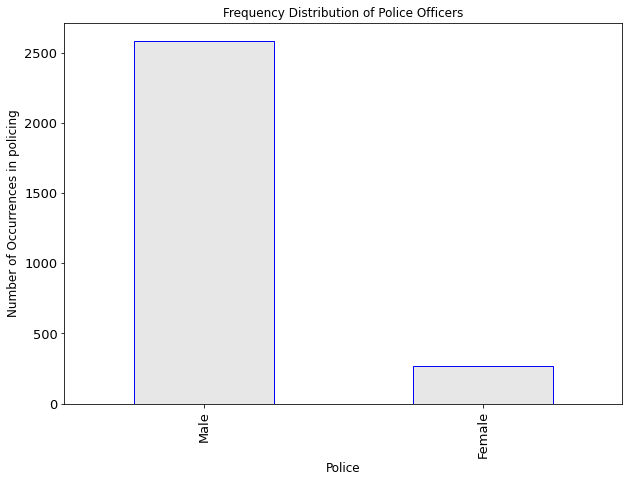

In [200]:
ax = data['Gender'].value_counts().plot(kind='bar', figsize=(10,7), fontsize=13, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
ax.set_alpha(0.8)
ax.set_title("Frequency Distribution of Police Officers", fontsize=12)
ax.set_ylabel('Number of Occurrences in policing', fontsize=12)
ax.set_xlabel('Police', fontsize=12)

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)


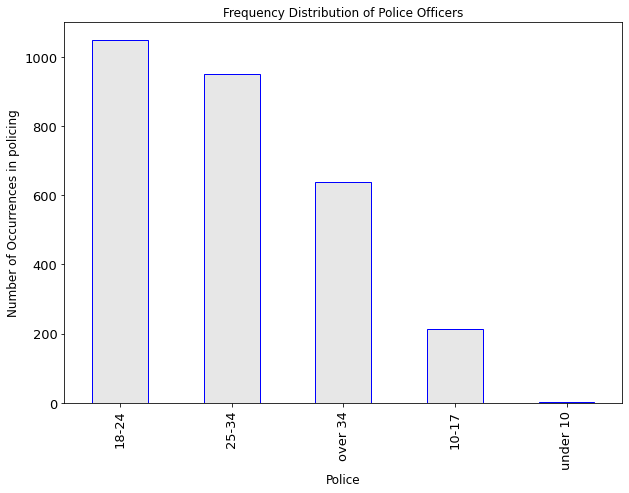

In [201]:
ax = data['Age range'].value_counts().plot(kind='bar', figsize=(10,7), fontsize=13, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
ax.set_alpha(0.8)
ax.set_title("Frequency Distribution of Police Officers", fontsize=12)
ax.set_ylabel('Number of Occurrences in policing', fontsize=12)
ax.set_xlabel('Police', fontsize=12)

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

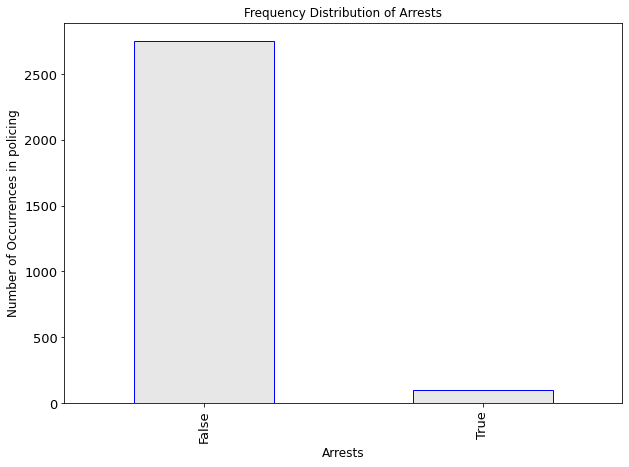

In [202]:
bx = data['Removal of more than just outer clothing'].value_counts().plot(kind='bar', figsize=(10,7),color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue', fontsize=13);
bx.set_alpha(0.8)
bx.set_title("Frequency Distribution of Arrests", fontsize=12)
bx.set_ylabel('Number of Occurrences in policing', fontsize=12)
bx.set_xlabel('Arrests', fontsize=12)


totals = []

# find the values and append to list
for i in bx.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)


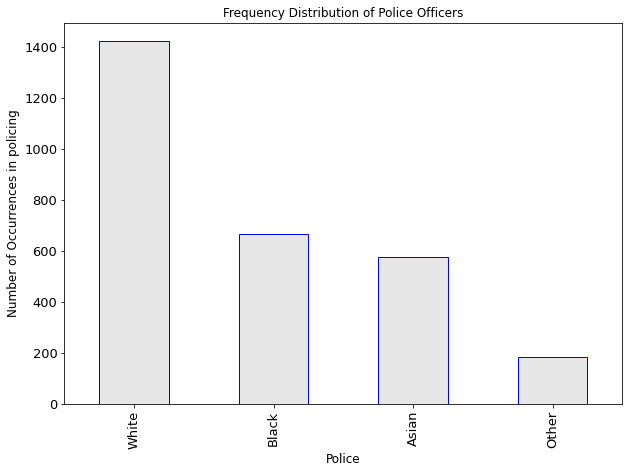

In [203]:
ax = data['Officer-defined ethnicity'].value_counts().plot(kind='bar', figsize=(10,7), fontsize=13, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue');
ax.set_alpha(0.8)
ax.set_title("Frequency Distribution of Police Officers", fontsize=12)
ax.set_ylabel('Number of Occurrences in policing', fontsize=12)
ax.set_xlabel('Police', fontsize=12)

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)


In [204]:
# set individual bar lables using above list
print("percentage of while, black , asian and other police:")
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    a = str(round((i.get_height()/total)*100, 2))
    print(a)

percentage of while, black , asian and other police:
49.96
23.44
20.25
6.35


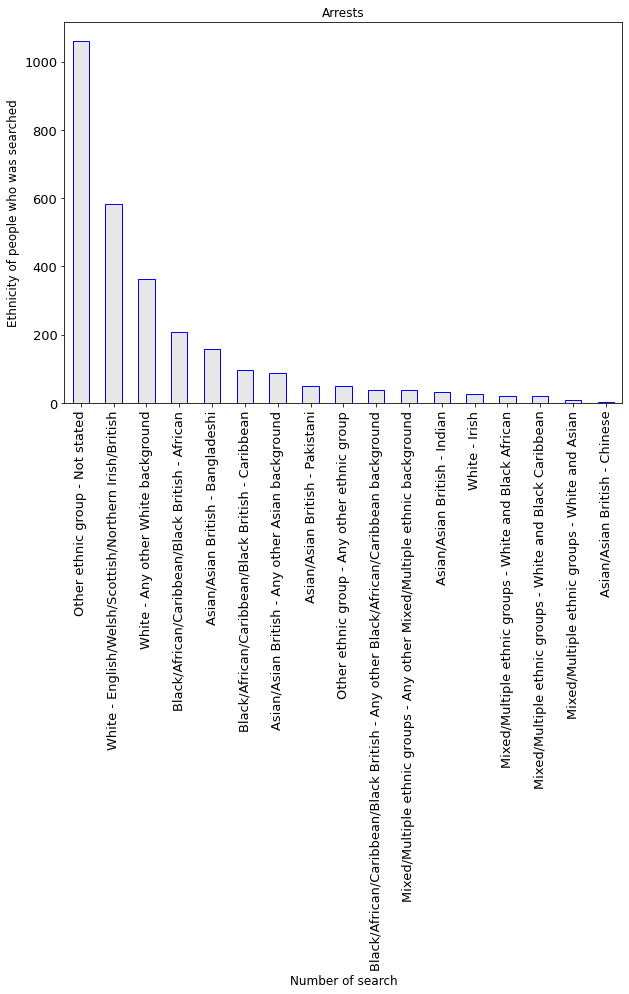

In [215]:
cx = data['Self-defined ethnicity'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue', fontsize=13);
cx.set_alpha(0.8)
cx.set_title("Arrests", fontsize=12)
cx.set_ylabel('Ethnicity of people who was searched', fontsize=12)
cx.set_xlabel('Number of search', fontsize=12)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in cx.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)


In [206]:
one = data[["City","Officer-defined ethnicity","Self-defined ethnicity","Removal of more than just outer clothing"]]
one.head()

,City,Officer-defined ethnicity,Self-defined ethnicity,Removal of more than just outer clothing
0,London,White,Other ethnic group - Any other ethnic group,False
1,London,Black,Other ethnic group - Not stated,False
2,London,Black,Black/African/Caribbean/Black British - African,False
3,London,Black,Other ethnic group - Not stated,False
4,London,Asian,Other ethnic group - Not stated,False


In [207]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
one['Removal of more than just outer clothing'] = labelencoder.fit_transform(one['Removal of more than just outer clothing'])
one['City'] = labelencoder.fit_transform(one['City'])
one = pd.get_dummies(one, columns=['Self-defined ethnicity'], prefix = ['self'])
print(one.head())

   City  ... self_White - Irish
0     0  ...                  0
1     0  ...                  0
2     0  ...                  0
3     0  ...                  0
4     0  ...                  0

[5 rows x 20 columns]


In [208]:
#helper function
def compute_outcome_stats(dfdf):
    """Compute statistics regarding the relative quanties of arrests, warnings, and citations"""
    n_total = len(dfdf)
    n_warnings = len(dfdf[dfdf['Outcome'] == 'Khat or Cannabis warning'])
    n_penalty = len(dfdf[dfdf['Outcome'] == 'Penalty Notice for Disorder'])
    n_arrests = len(dfdf[dfdf['Outcome'] == 'Arrest'])
    penalty_per_warning = n_penalty / n_warnings
    arrest_rate = n_arrests / n_total

    return(pd.Series(data = {
        'n_total': n_total,
        'n_warnings': n_warnings,
        'n_penalty': n_penalty,
        'n_arrests': n_arrests,
        'penalty_per_warning': penalty_per_warning,
        'arrest_rate': arrest_rate
    }))
compute_outcome_stats(df)

n_total                3047.000000
n_warnings              167.000000
n_penalty                12.000000
n_arrests               529.000000
penalty_per_warning       0.071856
arrest_rate               0.173613
dtype: float64

In [209]:
#breakdown by gender (using helper function)
df.groupby('Gender').apply(compute_outcome_stats)

,n_total,n_warnings,n_penalty,n_arrests,penalty_per_warning,arrest_rate
Gender,,,,,,
Female,299.0,16.0,2.0,50.0,0.125000,0.167224
Male,2747.0,151.0,10.0,479.0,0.066225,0.174372


In [210]:
#breakdown by race (using helper function)
df.groupby('Officer-defined ethnicity').apply(compute_outcome_stats)

,n_total,n_warnings,n_penalty,n_arrests,penalty_per_warning,arrest_rate
Officer-defined ethnicity,,,,,,
Asian,586.0,36.0,5.0,95.0,0.138889,0.162116
Black,685.0,37.0,2.0,136.0,0.054054,0.198540
Other,188.0,4.0,2.0,38.0,0.500000,0.202128
White,1444.0,88.0,3.0,246.0,0.034091,0.170360


In [211]:
#Racial bias
privileged_group = df[df["Officer-defined ethnicity"] == "Whites"]
underprivileged_group = df[df["Officer-defined ethnicity"] == "Non-Whites"]

In [212]:
#gender bias
privileged_group = df[df["Gender"] == "FEMALE"]
underprivileged_group = df[df["Gender"] == "MALE"]